In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

In [2]:
def display_benchmark(file_name):
    with open(file_name)as file:
        groups = json.load(file)
    for group in groups['data']:
        for bench in group['data']:
            for run in bench['data']:
                run['std'] = np.std(np.array(run['data']))
                run['mean'] = np.mean(np.array(run['data']))
    
    fig, axes = plt.subplots(len(groups['data']), 1)
    fig.set_size_inches(12, 10 * len(groups['data']))

    if len(groups['data']) == 1:
        axes = [axes]

    proc_group = groups['data'][0]
    ax = axes[0]
    ax.set_title(proc_group['name'])
    for bench in proc_group['data']:
        x = [run['processor_size'] for run in bench['data']]
        y = [run['mean'] for run in bench['data']]
        yerr = [run['std'] for run in bench['data']]
        ax.errorbar(x,y,yerr, label=" ".join([bench['name'], str(bench['data'][0]['matrix_size'])]))
    ax.legend()

    matrix_group = groups['data'][1]
    ax = axes[1]
    ax.set_title(matrix_group['name'])
    for bench in matrix_group['data']:
        x = [run['matrix_size'] for run in bench['data']]
        y = [run['mean'] for run in bench['data']]
        yerr = [run['std'] for run in bench['data']]
        ax.errorbar(x,y,yerr, label=" ".join([bench['name'], str(bench['data'][0]['processor_size'])]))
        #ax.set_yscale('log',base=2)
    ax.legend()

In [8]:
def display_processor_benchmark(file_name):
    with open(file_name)as file:
        groups = json.load(file)
    for group in groups['data']:
        for bench in group['data']:
            for run in bench['data']:
                run['std'] = np.std(np.array(run['data']))
                run['mean'] = np.mean(np.array(run['data']))
    
    fig, axes = plt.subplots(len(groups['data']), 1)
    fig.set_size_inches(12, 10 * len(groups['data']))

    if len(groups['data']) == 1:
        axes = [axes]
    ax_num = 0

    for group in groups['data']:
        ax = axes[ax_num]
        ax.set_title(group['name'])
        for bench in group['data']:
            x = [run['processor_size'] for run in bench['data']]
            y = [run['mean'] for run in bench['data']]
            yerr = [run['std'] for run in bench['data']]
            ax.errorbar(x,y,yerr, label=" ".join([bench['name'], str(bench['data'][0]['matrix_size'])]))
        ax.legend()
        ax_num += 1

In [3]:
def display_relative_benchmark(file_name):
    with open(file_name)as file:
        groups = json.load(file)
    for group in groups['data']:
        for bench in group['data']:
            for run in bench['data']:
                run['std'] = np.std(np.array(run['data']))
                run['mean'] = np.mean(np.array(run['data']))
    
    fig, axes = plt.subplots(len(groups['data']), 1)
    fig.set_size_inches(12, 10 * len(groups['data']))

    if len(groups['data']) == 1:
        axes = [axes]

    proc_group = groups['data'][0]
    ax = axes[0]
    ax.set_title(proc_group['name'])
    base = proc_group['data'][0]
    for bench in proc_group['data'][1:]:
        x = [run['processor_size'] for run in bench['data']]
        y = [run['mean'] - brun['mean'] for run,brun in zip(bench['data'], base['data'])]
        ax.plot(x,y, label=" ".join([bench['name'], str(bench['data'][0]['matrix_size'])]))
    ax.legend()

    matrix_group = groups['data'][1]
    ax = axes[1]
    base = matrix_group['data'][0]
    for bench in matrix_group['data'][1:]:
        x = [run['matrix_size'] for run in bench['data']]
        y = [run['mean'] - brun['mean'] for run,brun in zip(bench['data'], base['data'])]
        ax.plot(x,y, label=" ".join([bench['name'], str(bench['data'][0]['processor_size'])]))
        #ax.set_yscale('log',base=2)
    ax.legend()

# Thread Time

## Local Runs

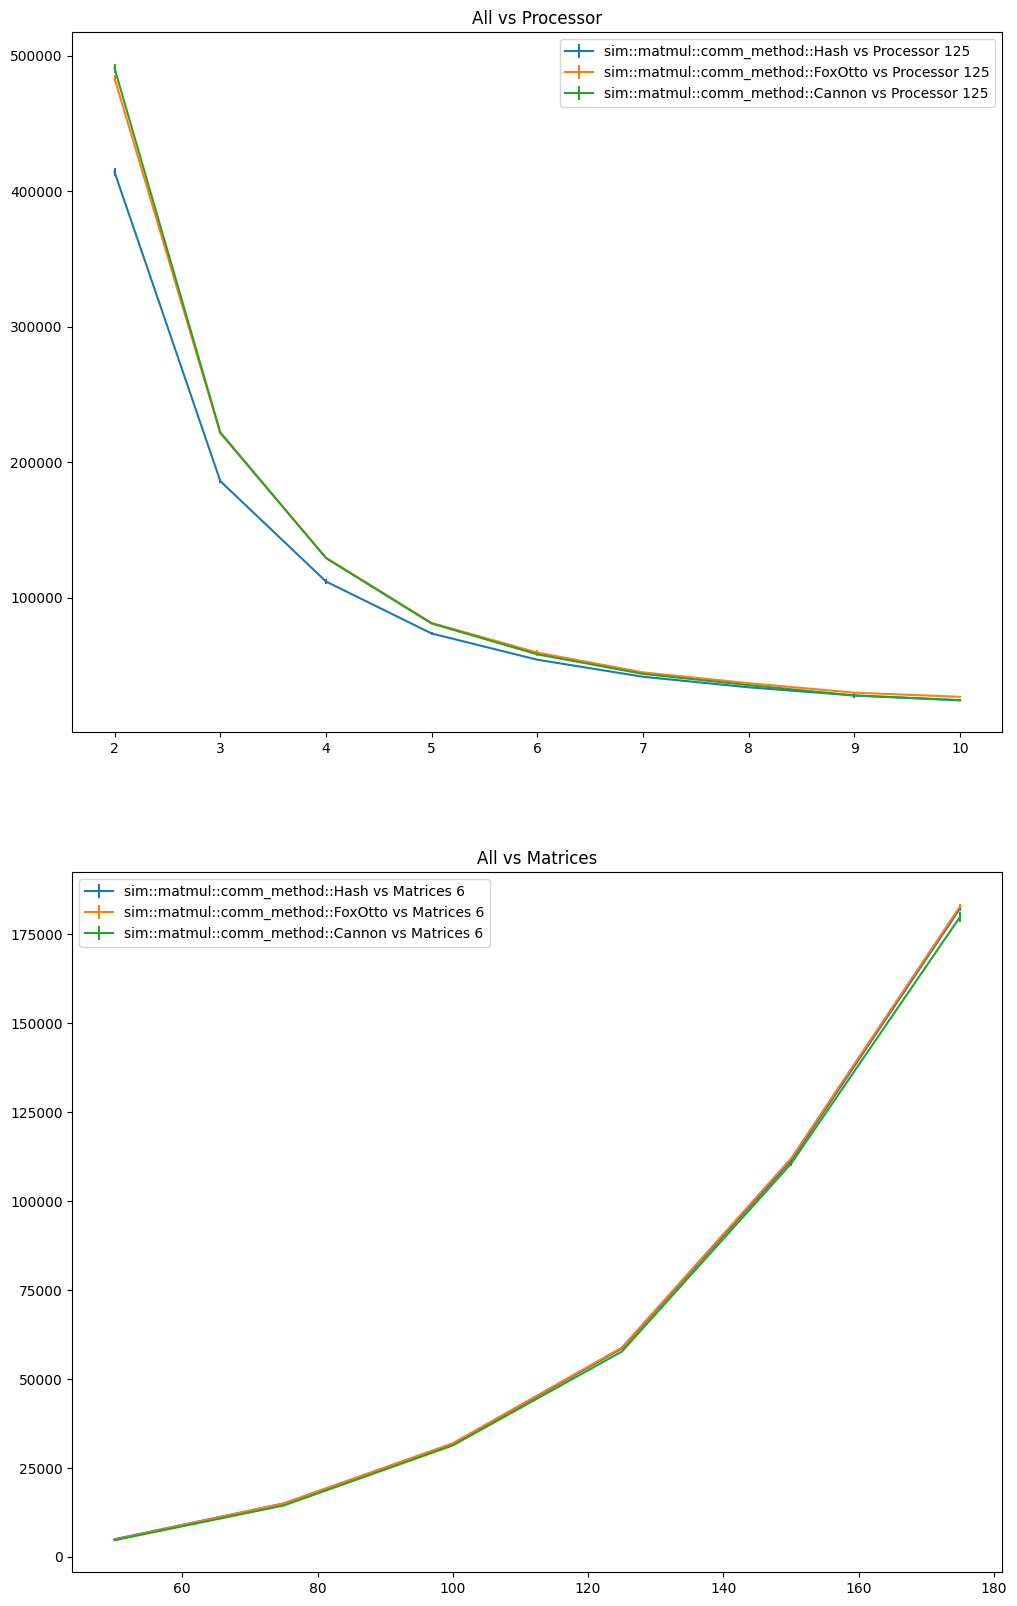

In [17]:
display_benchmark("thread_time/data_local1.json")

## Remote Runs

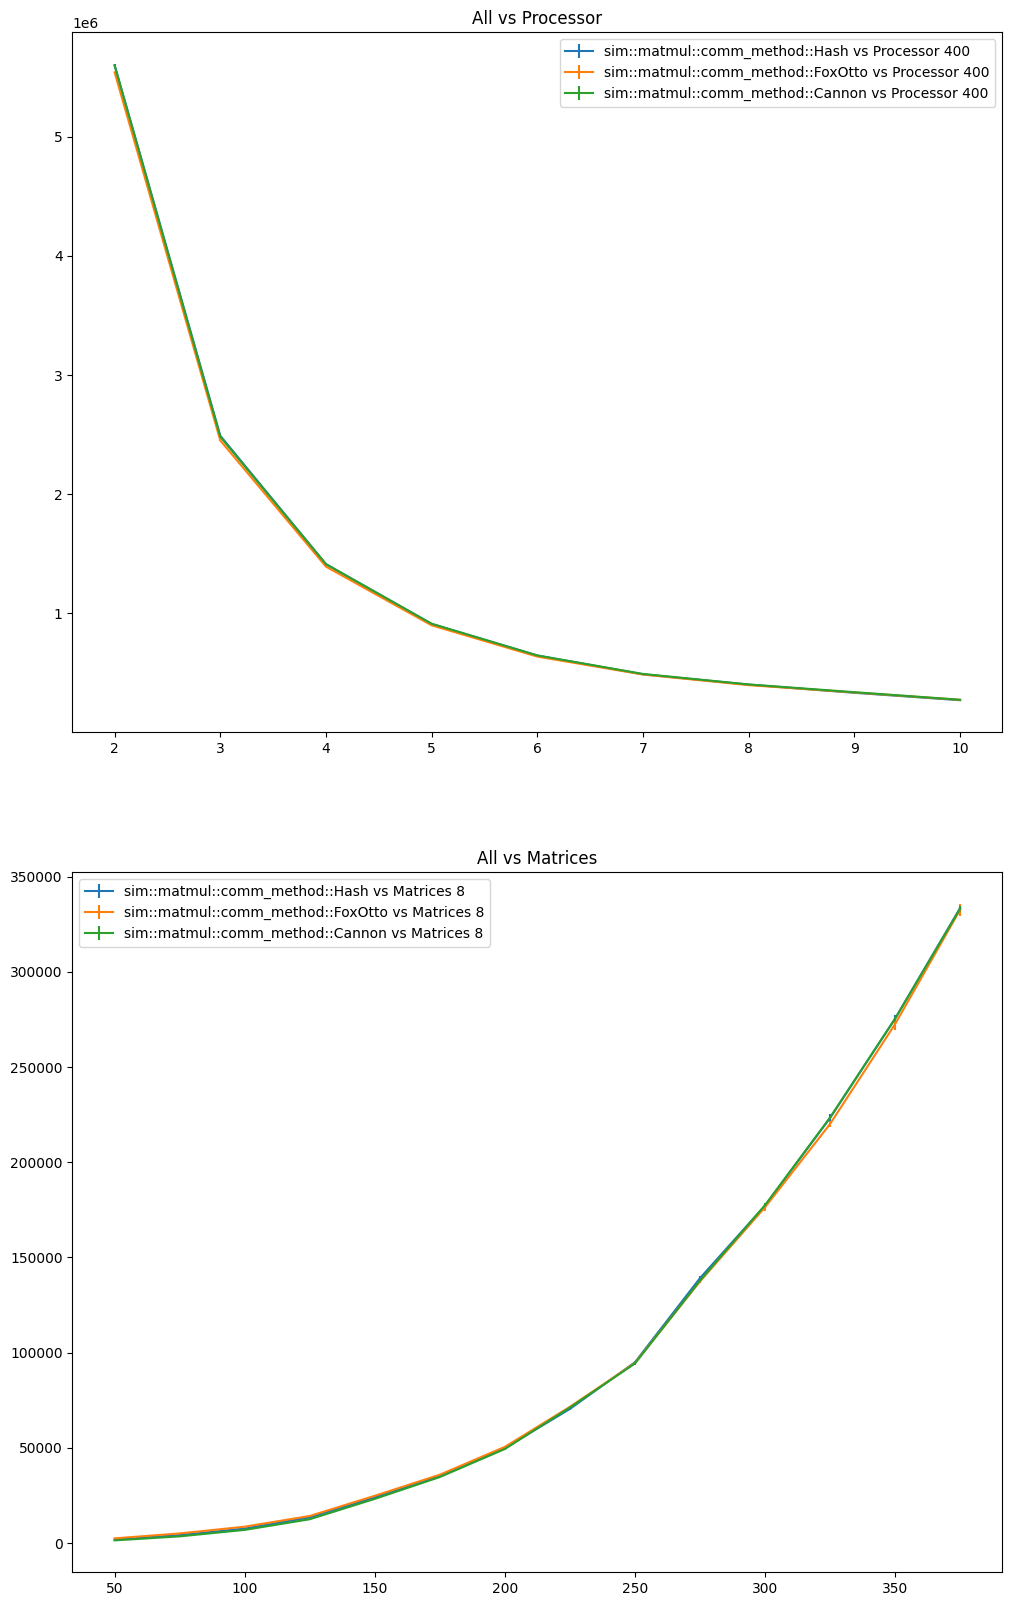

In [12]:
display_benchmark("thread_time/data_remote1.json")

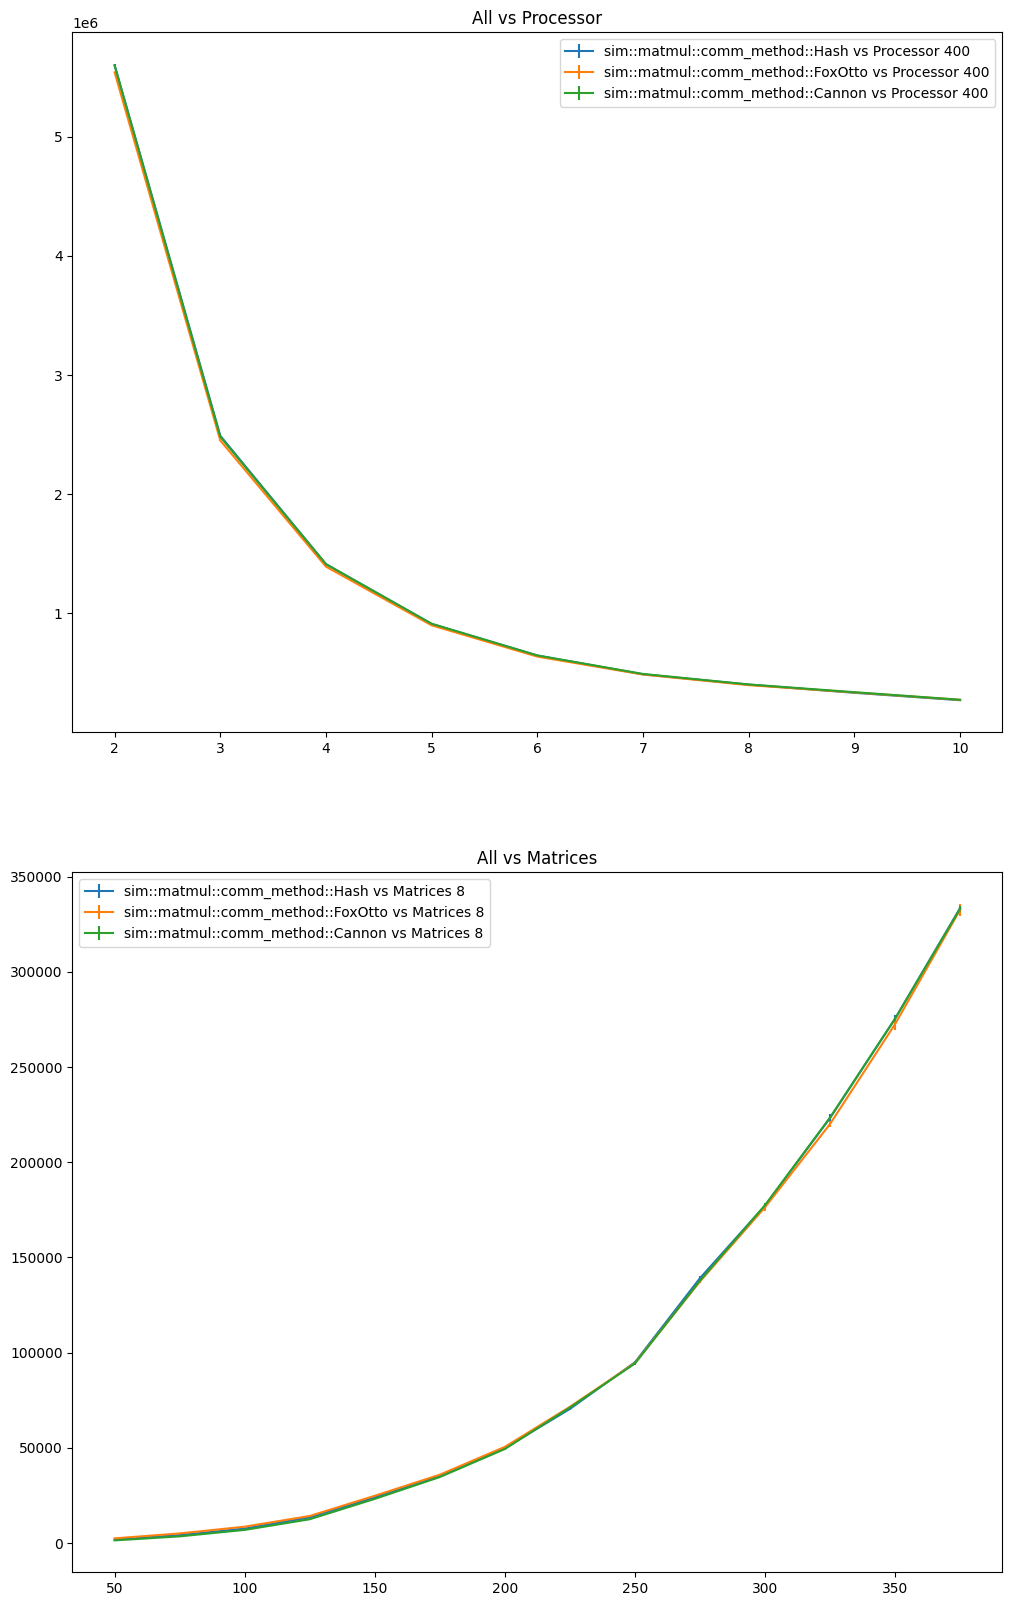

In [13]:
display_benchmark("thread_time/data_remote2.json")

# Wallclock Time

## Local Runs

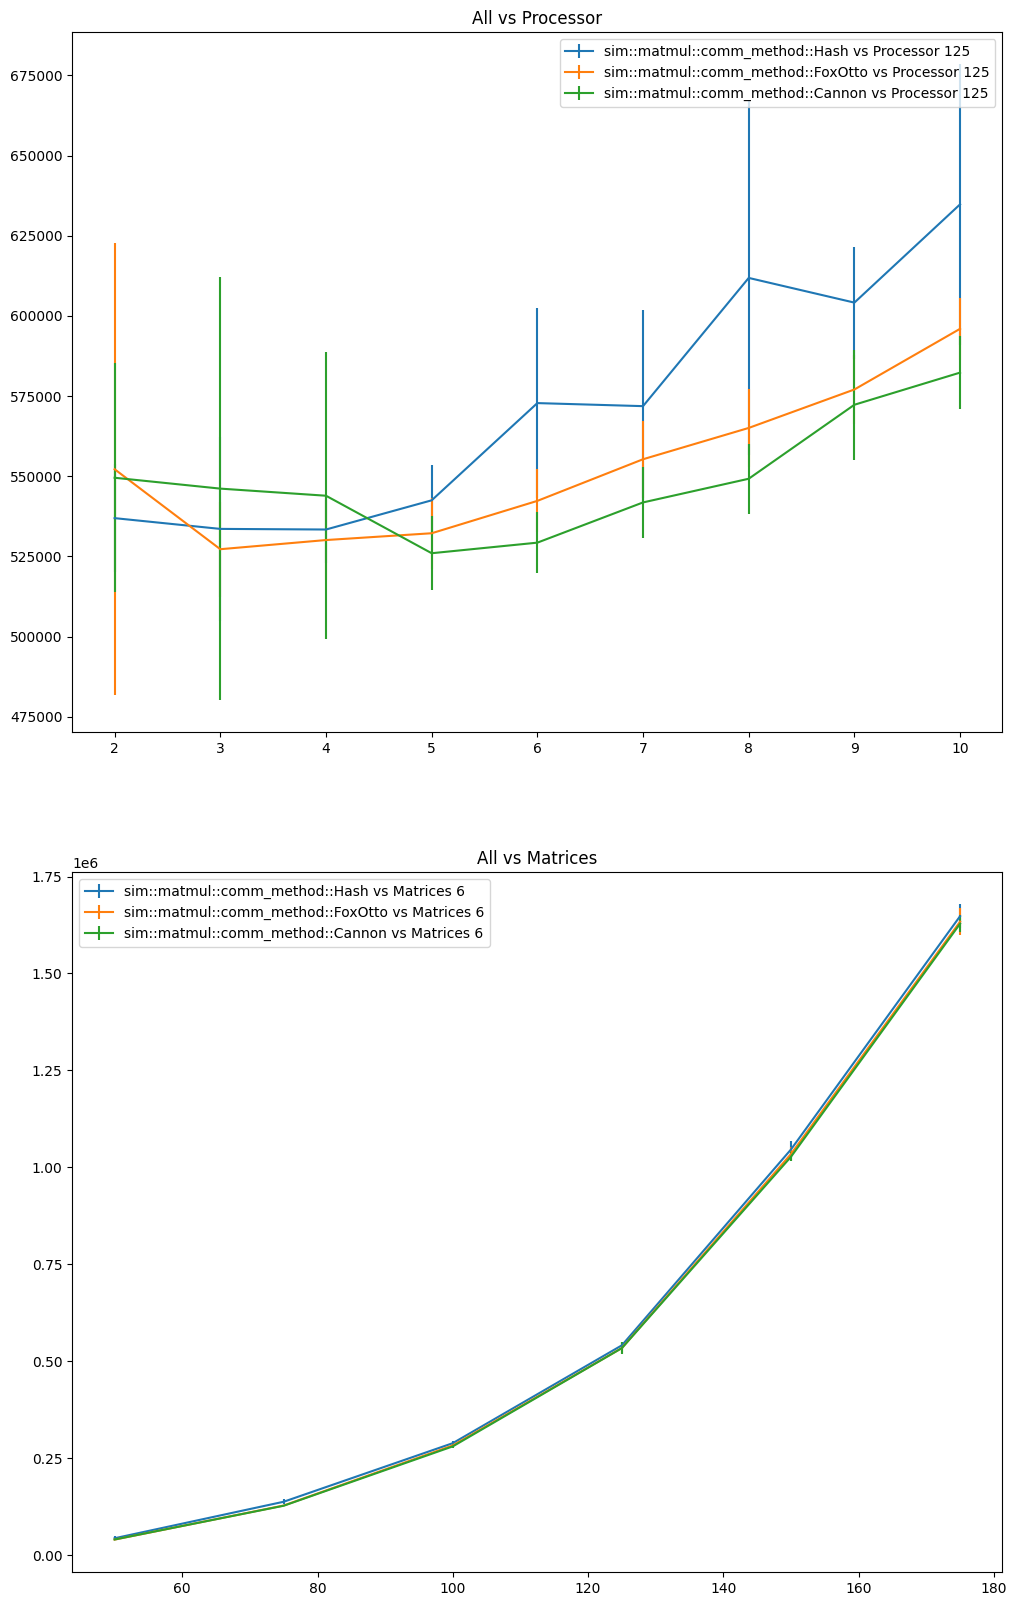

In [18]:
display_benchmark("wall_time/data_local1.json")

## Remote Runs

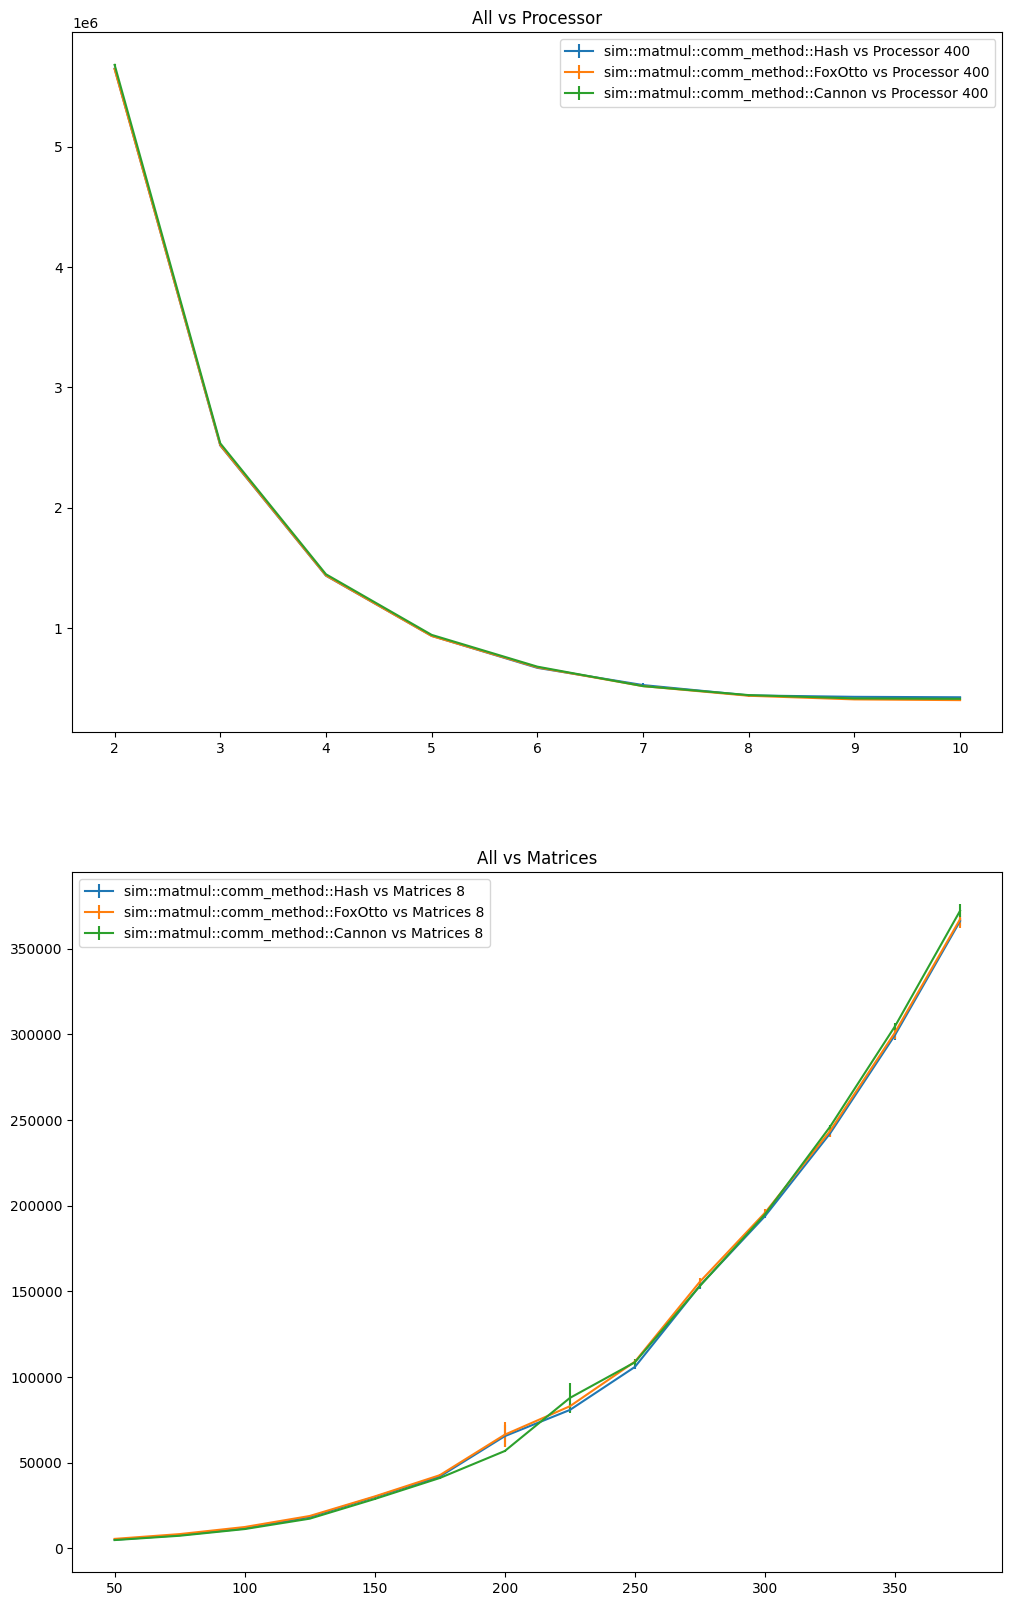

In [20]:
display_benchmark("wall_time/data_remote1.json")

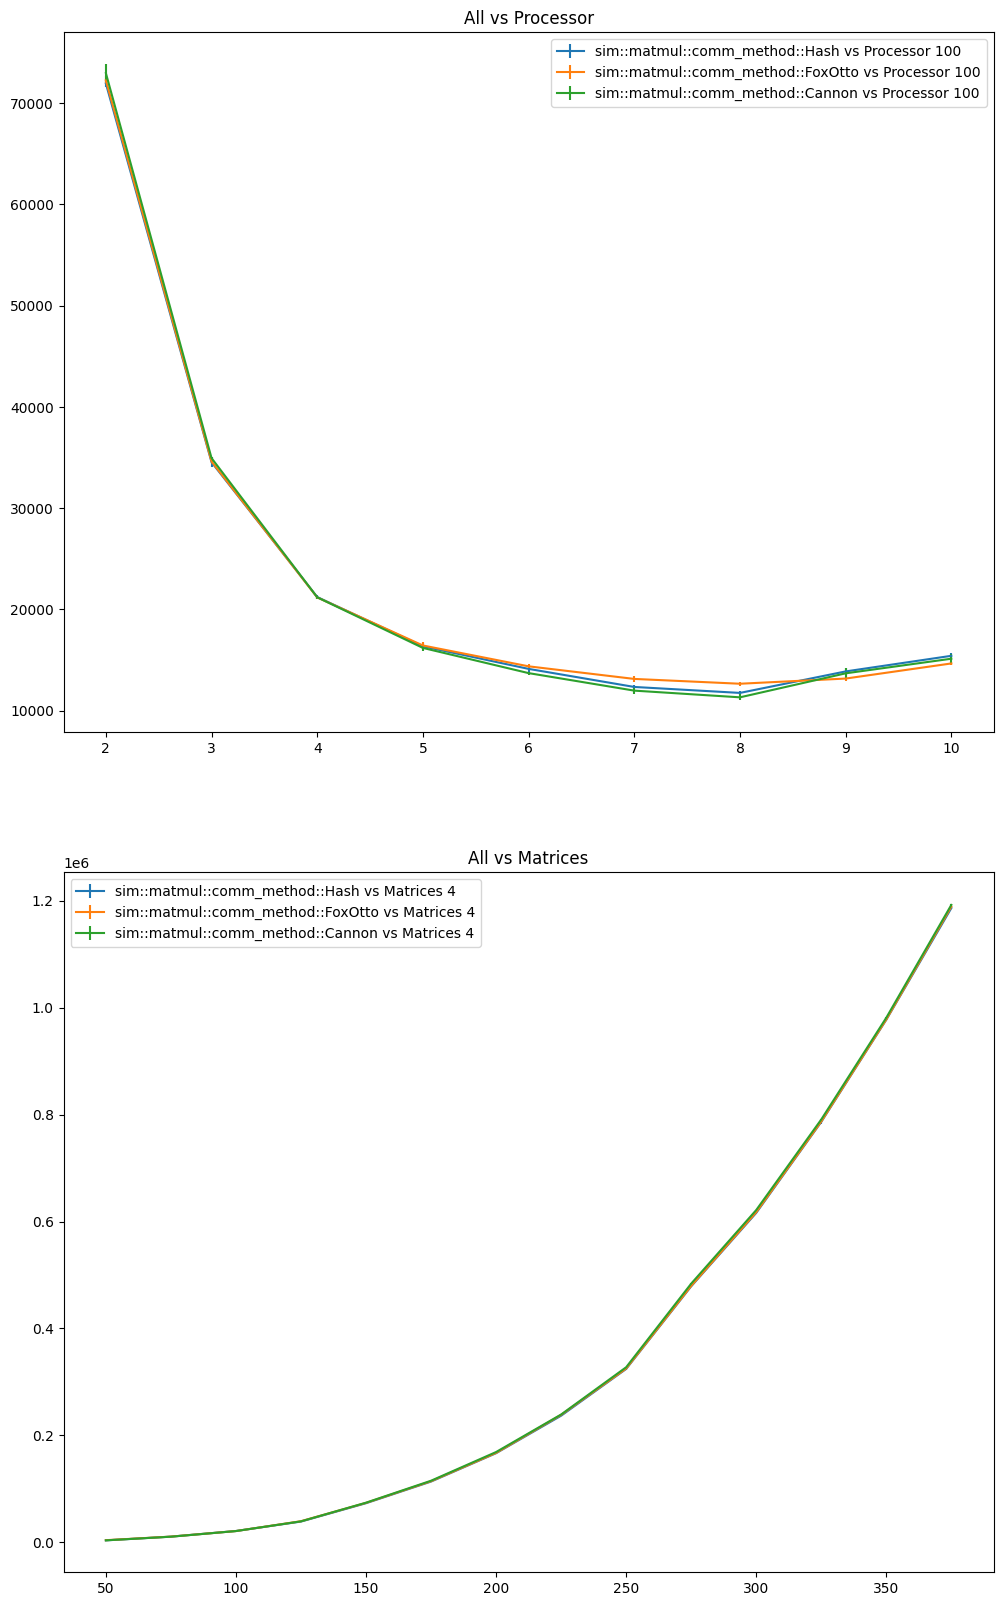

In [21]:
display_benchmark("wall_time/data_remote2.json")

# Speedup

In [48]:
with open('../data.json')as file:
    groups = json.load(file)

In [49]:
groups

{'data': [{'name': 'All vs Processor',
   'data': [{'name': 'sim::matmul::comm_method::Hash vs Processor',
     'data': [{'matrix_size': 125,
       'processor_size': 2,
       'data': [409317,
        400749,
        418435,
        406519,
        414132,
        419020,
        414223,
        413638,
        402725,
        413621,
        410990,
        412954,
        414543,
        408485,
        410584,
        409870,
        413660,
        416693,
        408197,
        411619]},
      {'matrix_size': 125,
       'processor_size': 3,
       'data': [187900,
        188886,
        191318,
        191012,
        190546,
        192252,
        192037,
        196529,
        195779,
        194426,
        198485,
        195950,
        196782,
        196822,
        200894,
        198509,
        199329,
        199628,
        199178,
        199448]},
      {'matrix_size': 125,
       'processor_size': 4,
       'data': [115637,
        117264,
        115572,
    

In [50]:
Hash = []
for group in groups['data']:
    for bench in group['data']:
        if bench['name'] == 'sim::matmul::comm_method::Hash vs Processor':
            Hash.append(bench['data'])

FoxOtto = []
for group in groups['data']:
    for bench in group['data']:
        if bench['name'] == 'sim::matmul::comm_method::FoxOtto vs Processor':
            FoxOtto.append(bench['data'])

Cannon = []
for group in groups['data']:
    for bench in group['data']:
        if bench['name'] == 'sim::matmul::comm_method::Cannon vs Processor':
            Cannon.append(bench['data'])

In [51]:
relativeFoxOtto = []
for benchHash, benchFoxOtto in zip(Hash, FoxOtto):
    relativeBench = []
    for runHash, runFoxOtto in zip(benchHash, benchFoxOtto):
        relativeRun = {}
        relativeRun['matrix_size'] = runHash['matrix_size']
        relativeRun['processor_size'] = runHash['processor_size']
        relativeRun['data'] = [timeHash / timeFoxOtto for timeHash, timeFoxOtto in zip(runHash['data'], runFoxOtto['data'])]
        relativeBench.append(relativeRun)
    relativeFoxOtto.append(relativeBench)

relativeCannon = []
for benchHash, benchCannon in zip(Hash, Cannon):
    relativeBench = []
    for runHash, runCannon in zip(benchHash, benchCannon):
        relativeRun = {}
        relativeRun['matrix_size'] = runHash['matrix_size']
        relativeRun['processor_size'] = runHash['processor_size']
        relativeRun['data'] = [timeHash / timeCannon for timeHash, timeCannon in zip(runHash['data'], runCannon['data'])]
        relativeBench.append(relativeRun)
    relativeCannon.append(relativeBench)
relative = [relativeFoxOtto, relativeCannon]

In [52]:
for relativeComm in relative:
    for bench in relativeComm:
        for run in bench:
            run['std'] = np.std(np.array(run['data']))
            run['mean'] = np.mean(np.array(run['data']))

In [53]:
relative

[[[{'matrix_size': 125,
    'processor_size': 2,
    'data': [0.8113207547169812,
     0.7840451548529728,
     0.8215110297871003,
     0.8156562565836335,
     0.8147601650248777,
     0.8501322815730957,
     0.8203832731910781,
     0.8189197429430095,
     0.7958756163354841,
     0.816023311513315,
     0.8221510074095412,
     0.8137746204096915,
     0.8162287645015712,
     0.814237419221094,
     0.8044751408278227,
     0.8112494631189966,
     0.8143987494413634,
     0.8205218583054866,
     0.8027157240619838,
     0.8157849883464667],
    'std': 0.012266694094994443,
    'mean': 0.8142082661082781},
   {'matrix_size': 125,
    'processor_size': 3,
    'data': [0.8105741315123096,
     0.8151440741236228,
     0.8290670514770565,
     0.8277589509356122,
     0.8241038682444122,
     0.8301538089521819,
     0.8320457883631354,
     0.8480837860813955,
     0.849230275400478,
     0.8429408806340287,
     0.8609494148571627,
     0.8447322248423267,
     0.850691682517724

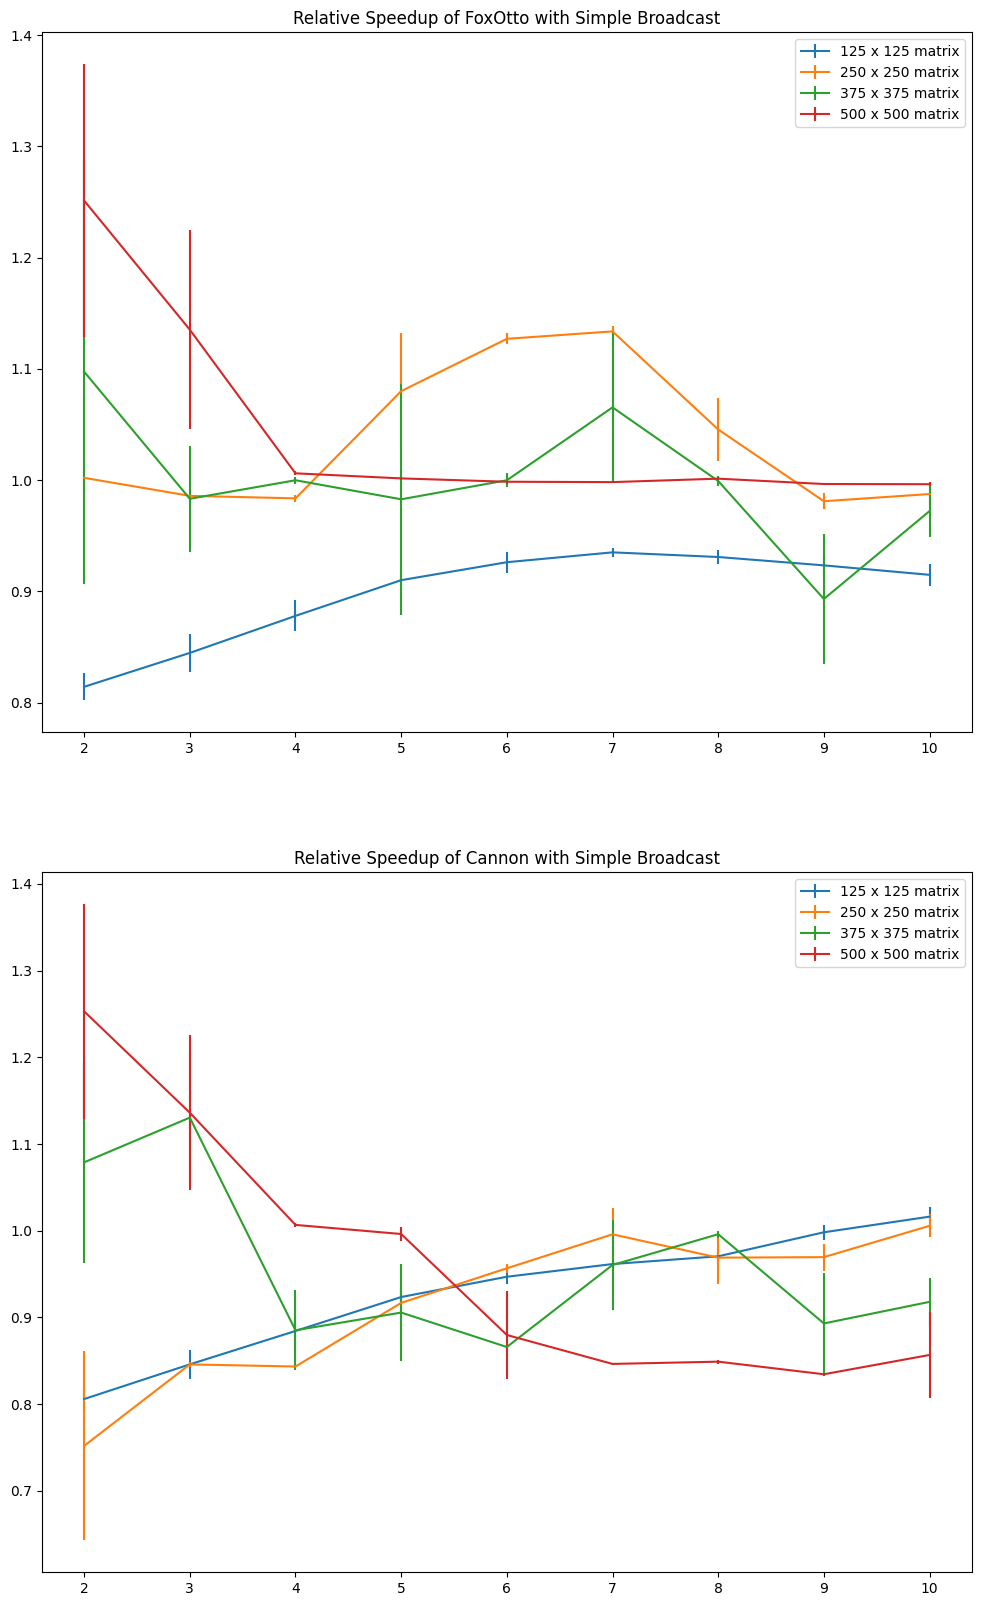

In [54]:
fig, axes = plt.subplots(len(relative), 1)
fig.set_size_inches(12, 10 * len(relative))

if len(groups['data']) == 1:
    axes = [axes]

ax_num = 0

for relativeComm, name in zip(relative, ['FoxOtto','Cannon']):
    ax = axes[ax_num]
    ax.set_title('Relative Speedup of {} with Simple Broadcast'.format(name))
    for bench in relativeComm:
        x = [run['processor_size'] for run in bench]
        y = [run['mean'] for run in bench]
        yerr = [run['std'] for run in bench]
        ax.errorbar(x,y,yerr, label="{} x {} matrix".format(str(bench[0]['matrix_size']),str(bench[0]['matrix_size'])))
    ax.legend()
    ax_num += 1